<a href="https://colab.research.google.com/github/NarkisRaam/AdvancedMLDL.exercise1/blob/main/exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sagi Huly 314696550 <br>
Yuval Berland 313331134 <br>
Narkis Raam 204811145 <br>
Dana Shidlovsky 312234347
 

# Imports

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from scipy.special import boxcox, inv_boxcox #For boxcox transformation
from sklearn.metrics import mean_squared_error

# Other Libaries
import time
from typing import List, Dict
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


# Data Understanding / Exploration 

In [ ]:
# Statistics describe
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000


In [ ]:
# Features types and not null sumerize
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
 12  count       8164 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 829.3+ KB


As we can see, there are no NULL values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fb049b550>,
      dtype=object)

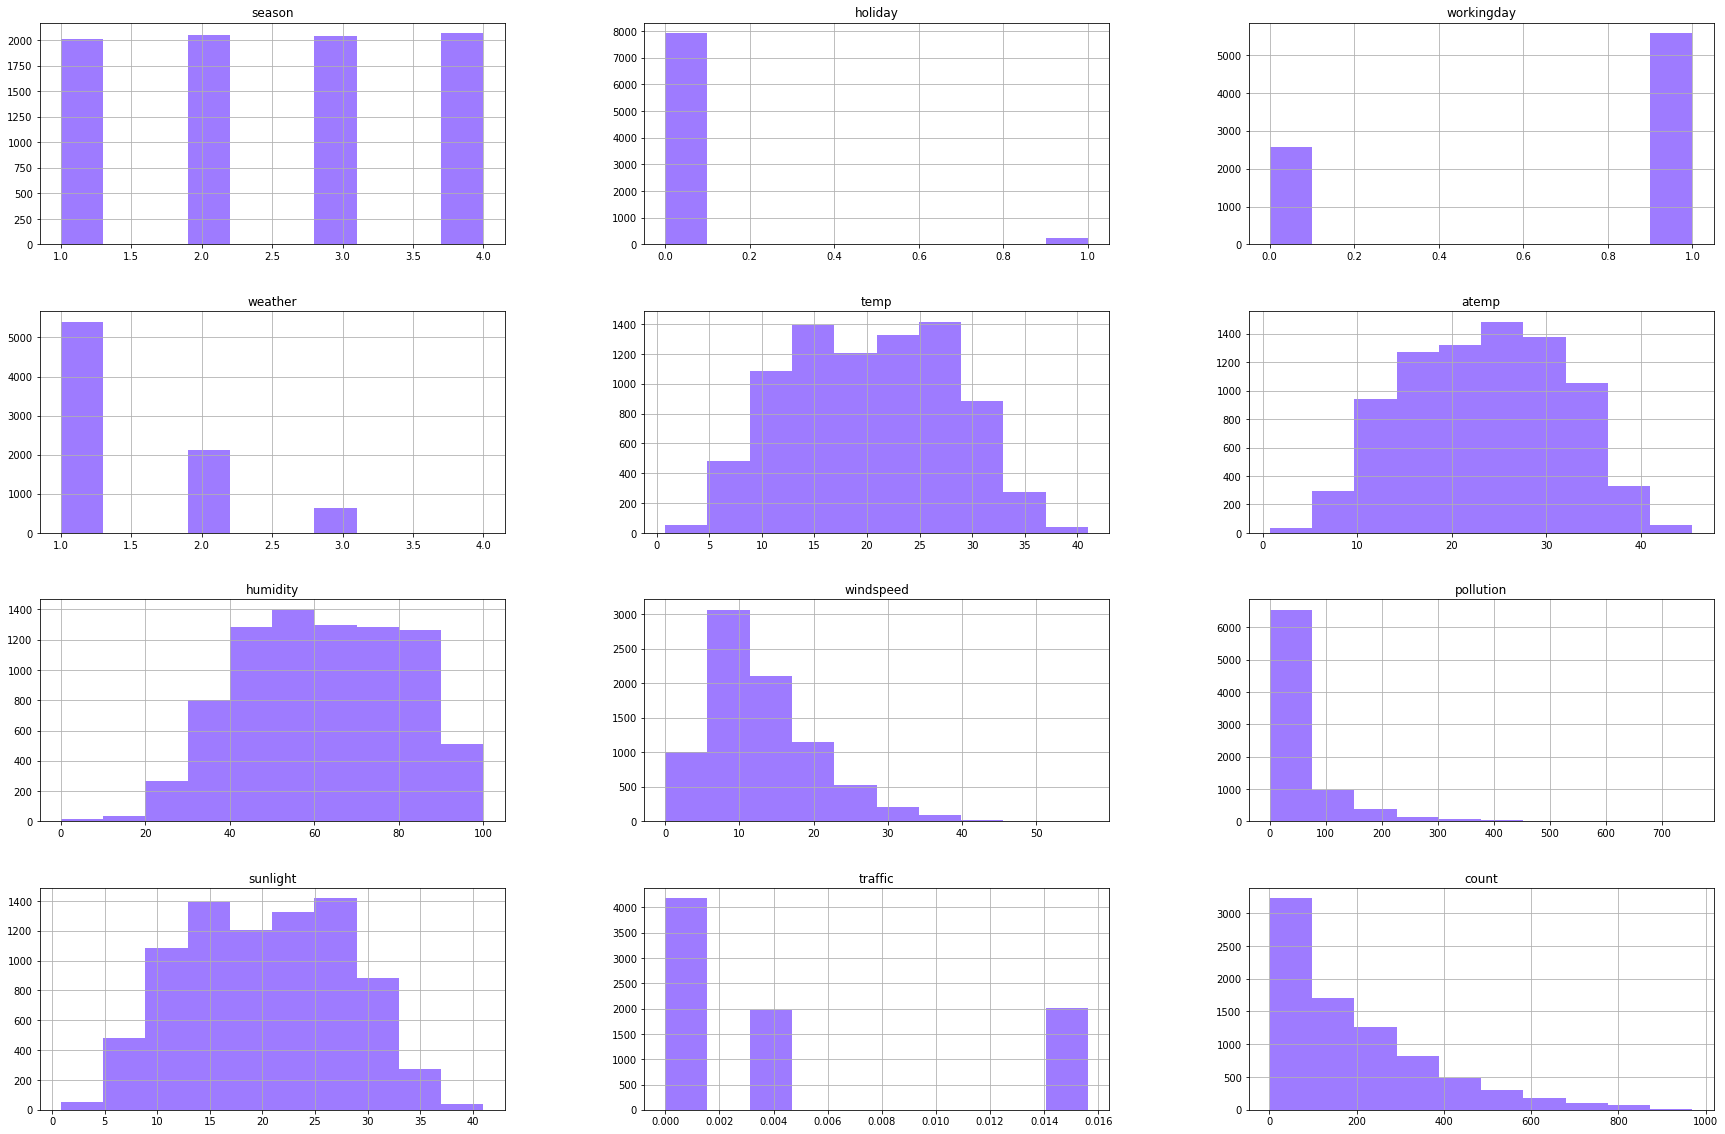

In [ ]:
# Numerical features Histogtam
data.iloc[:, :].hist(figsize=(30,20),color = '#9E7BFF')

First insights:
- 'datetime' feature need to be handled from string object into more detailed features. 
- 'Season' is a catagorial feature, eventhough it distributed between [1, 4]. In addition 'workingday', 'holiday', 'weather' are catagorials features.
- 'hunidity', 'temp', 'atemp', 'sunlight' seem to be normal distributed - what can be useful in outliers detection.

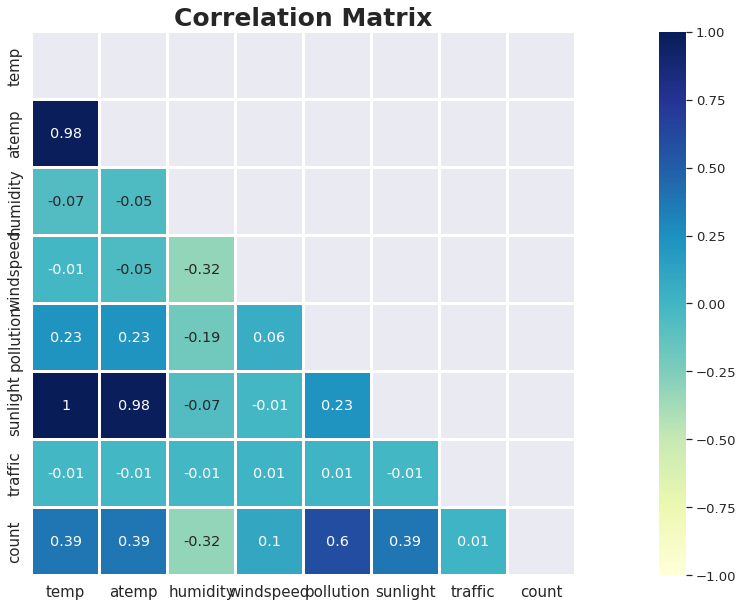

In [ ]:
numerical_variabels = data[[col for col in data.columns if col not in ('season', 'holiday', 'workingday', 'weather')]]
fig = plt.figure(figsize=(30,10))
corr = numerical_variabels.corr().round(2)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale = 1.2)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, square=True,linewidths=2,cmap="YlGnBu", mask=mask)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation Matrix",size=25, weight='bold')
plt.show()

We can wee that there is strong corralation between:
1. perfect corralation between 'temp' and 'sunlight'. Due to that, we will try to remove 'sunlight' column in feature engineering part.
2. 'sunlight' and 'atemp' (0.98)
3. 'temp' and 'atemp' (0.98)
This corralation makes sence since 'atemp' describes the average temperature. Due to that, we will consider removing one of those features.


# Rearrangement Of 'datetime' Feature Before Analyzing

In [ ]:
def handle_datetime(data):
    data.insert(1, 'day_of_week', pd.to_datetime(data['datetime']).dt.dayofweek)
    split_datetime = pd.DataFrame(data['datetime'].str.split(' ').to_list(), columns = ['new_date', 'new_hour'])
    data.drop('datetime', axis=1, inplace=True)
    split_dates_df = pd.DataFrame(split_datetime['new_date'].str.split('-').to_list(), columns = ['year', 'month', 'day'])
    split_hours_df = pd.DataFrame(split_datetime['new_hour'].str.split(':').to_list(), columns = ['hour', 'minute', 'second'])
    total_time_frames = split_dates_df.join(split_hours_df)
    total_time_frames.drop(['second', 'minute'], axis=1, inplace=True)
    df = total_time_frames.join(data)
    return df
df = handle_datetime(data)

As we suspected, the 'seconds' and 'minutes' are fixed to '00', so we can drop them.

In [ ]:
# Another look on the data after rearrangment of 'datetime' column.
df

,year,month,day,hour,day_of_week,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011,07,11,00,0,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012,05,18,22,4,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011,04,01,23,4,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012,09,16,09,6,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011,02,01,23,1,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012,01,14,02,5,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011,12,10,09,5,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011,12,18,16,6,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011,02,19,07,5,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


# Plotting Before Data Engineering

In [ ]:
# Apply changes on months before plotting
def handle_months(df):    
    months_dict = {'12' : 'Dec','01' : 'Jan', '02' : 'Feb', '03' : 'March', '04' : 'April', '05' : 'May', '06' : 'June', '07' : 'July', '08' : 'Aug', '09' : 'Sep', '10' : 'Oct' , '11' : 'Nov'}
    df.replace({"month": months_dict},inplace=True)
    return df
df = handle_months(df)

In [ ]:
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average Count By Month')]

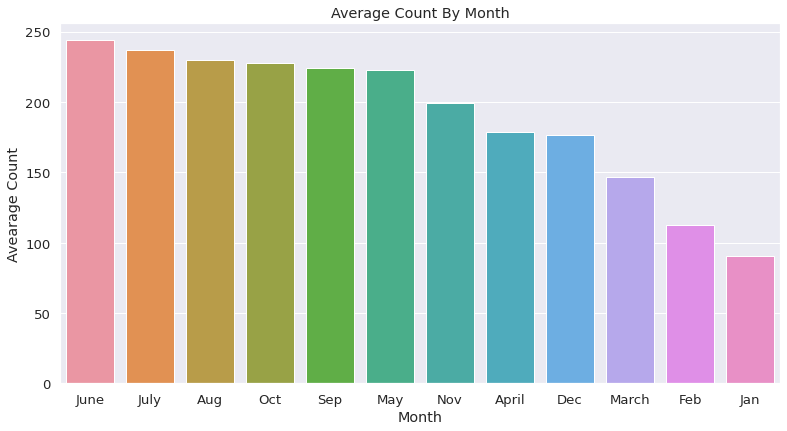

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
month_sorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=month_sorted,x="month",y="count",ax=ax)
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

In average, we can see that the summer months have the highest average of the bike hires, and it decreasing with months who relate to the winter.

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

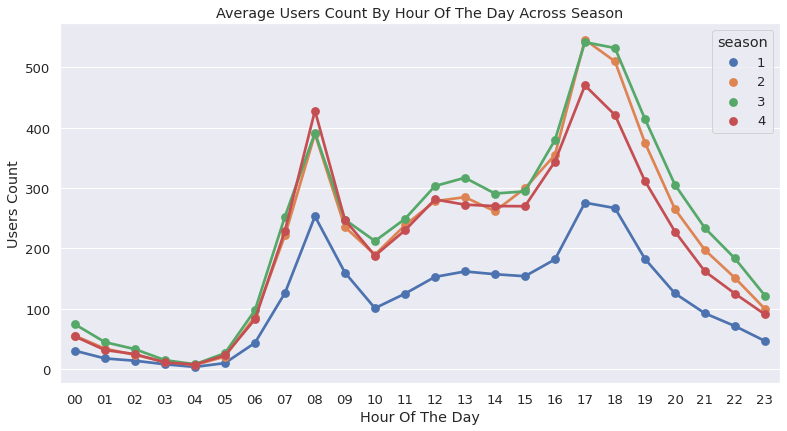

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
hour_aggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],hue=hour_aggregated["season"], data=hour_aggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Year'),
 None]

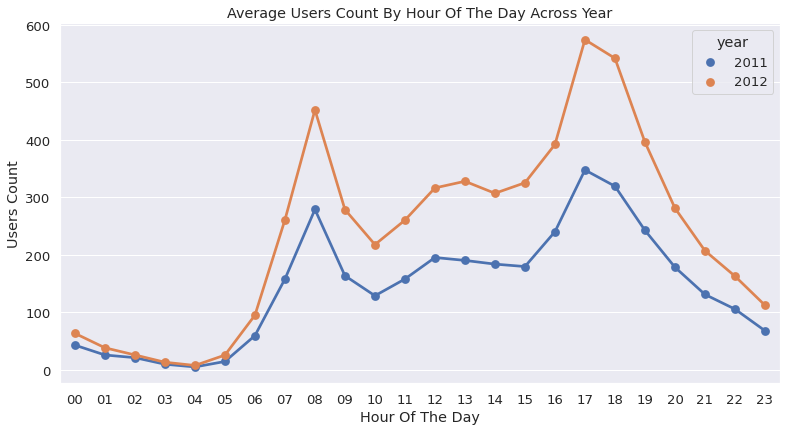

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
hour_aggregated = pd.DataFrame(df.groupby(["hour","year"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],hue=hour_aggregated["year"], data=hour_aggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Year",label='big')

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Holiday'),
 None]

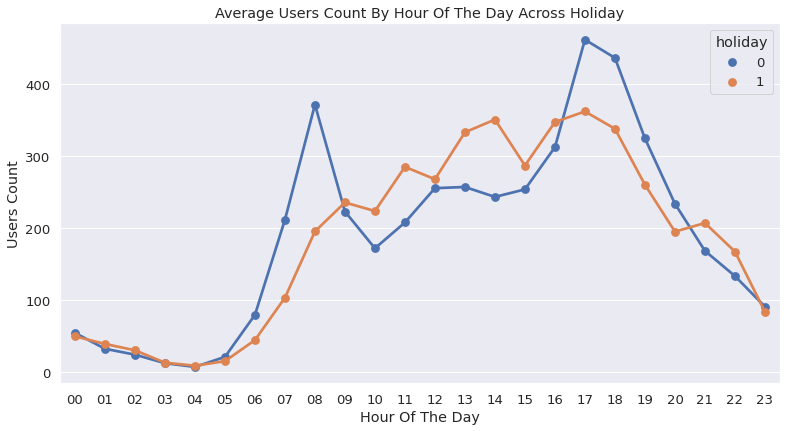

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
hour_aggregated = pd.DataFrame(df.groupby(["hour","holiday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],hue=hour_aggregated["holiday"], data=hour_aggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Holiday",label='big')

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Workday'),
 None]

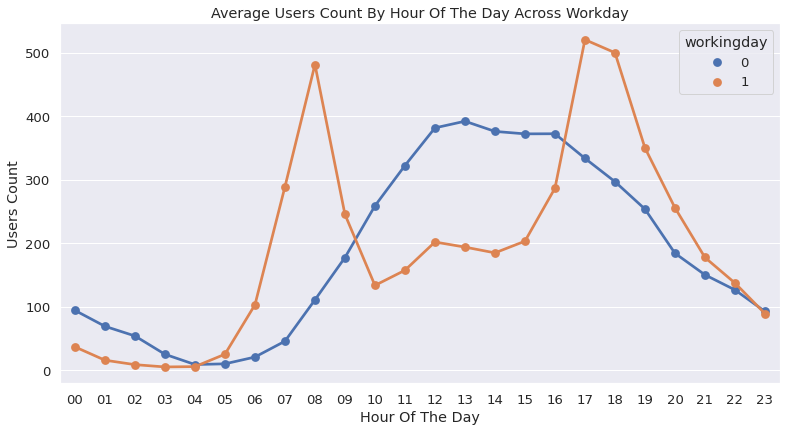

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
hour_aggregated = pd.DataFrame(df.groupby(["hour","workingday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],hue=hour_aggregated["workingday"], data=hour_aggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Workday",label='big')

This chart was the most significance in terms of recognizing the diffrences of the hiring hours and hiring. For example, we can see that there is a diffrence between the morning hiring patterns when it's a working day and when it's not- while in working days pepole go to work and start to hire bikes early (06:00) comapre to non working days when pepole start to hire bikes lately. (08:00) With this chart and insight we sliced the data respectively.

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Num Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By The Day Across Years'),
 None]

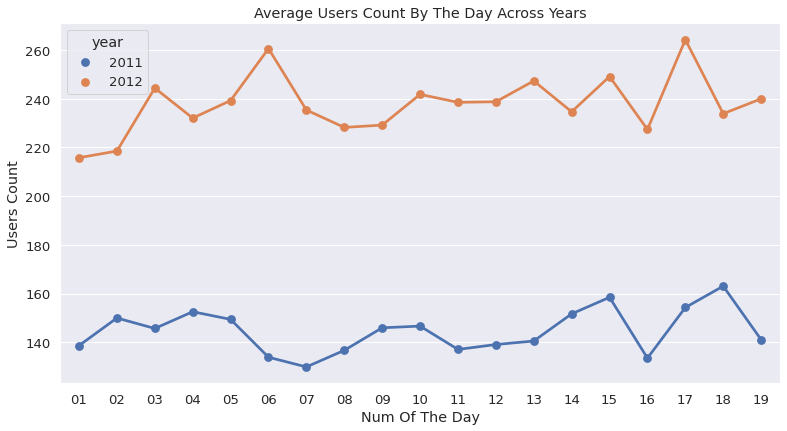

In [ ]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
days_aggregated = pd.DataFrame(df.groupby(["day", "year"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=days_aggregated["day"], y=days_aggregated["count"], hue=days_aggregated["year"], data=days_aggregated, join=True,ax=ax)
ax.set(xlabel='Num Of The Day', ylabel='Users Count',title="Average Users Count By The Day Across Years",label='big')

As we can see the the diffrence between the years is meaningful, there was a clear increase in the use of shared bikes. With this insight we've decided to transform this feature to catagorial.

# 'days' & 'hours' Buckets Engineering:

In [ ]:
def change_day_weather_hour(df):
    day_of_week_dict = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
    df.replace({"day_of_week": day_of_week_dict},inplace=True)
    days_dic = {}
    for i in range(1,32):
        if i < 10:
            days_dic['0' + str(i)] = 'beginning_of_month'
        elif i <= 20:
            days_dic[str(i)] = 'middle_of_month'
        else:
            days_dic[str(i)] = 'end_of_month' 
    df.replace({"day": days_dic},inplace=True)
    df.rename(columns = {'day':'time_in_month'}, inplace = True)
    # Hours buckets
    df['hour'] = df['hour'].astype(int)
    working_day_hours_dict = {}
    for i in range(0, 24):
        if i <= 5:
            working_day_hours_dict[i] = 'working_day_night_ride'
        elif i <= 10 :
            working_day_hours_dict[i] ='working_day_morning_ride'
        elif i <= 15:
            working_day_hours_dict[i] ='working_day_mid_day_ride'
        elif i <= 20:
            working_day_hours_dict[i] ='working_day_afternoon_evening_ride'
        elif i <= 23:
            working_day_hours_dict[i] ='working_day_late_evening_ride'
    non_working_day_hours_dict = {}
    for i in range(0, 24):
        if i <= 7:
            non_working_day_hours_dict[i] = 'non_working_day_night_early_morning_ride'
        elif i <= 12 :
            non_working_day_hours_dict[i] ='non_working_day_morning_ride'
        elif i <= 18:
            non_working_day_hours_dict[i] ='non_working_day_mid_day_ride'
        elif i <= 23:
            non_working_day_hours_dict[i] ='non_working_day_afternoon__evening_ride'
    df.loc[df['workingday'] == 1, 'hour'] = df['hour'].map(working_day_hours_dict)
    df.loc[df['workingday'] == 0, 'hour'] = df['hour'].map(non_working_day_hours_dict)
    df.rename(columns = {'hour':'hour_bucket'}, inplace = True)
    # 'season' and 'weather' buckets
    season_dict = {1 : 'winter', 2 : 'spring', 3 : 'summer', 4 : 'fall'}
    df.replace({"season": season_dict},inplace=True)
    weather_dict = {1 : 'Clear + Few clouds + Partly cloudy + Partly cloudy', 2 : 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3 : 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud'}
    df.replace({"weather": weather_dict},inplace=True)
    df.drop(df[df.weather == 4].index, inplace=True)
    df.rename(columns = {'workingday':'is_workingday'}, inplace = True)
    df.rename(columns = {'holiday':'is_holiday'}, inplace = True)
    return df
df = change_day_weather_hour(df)

- The 'weather' feature has 4 unique values, due to the fact that the weather = 4 appere just once, and doesn't appear at all in the test set, we've decided to drop the raw who had contained this value. 

# Weather & Seasons Exploration

In [ ]:
# Creating data frame for plotting
temp_bins = [temp for temp in range(0,45,5)]
temp_buckets = []
for i in range(len(temp_bins) - 1):
    temp_buckets.append('between_' + str(temp_bins[i]) + '_to_' + str(temp_bins[i] + 5))
df['temp_buckets'] = pd.cut(x=df['temp'], bins=temp_bins, labels=temp_buckets, right=False) 
climate_df = df[['weather','temp_buckets', 'season', 'month', 'count']].copy()
df.drop('temp_buckets', axis=1, inplace=True)

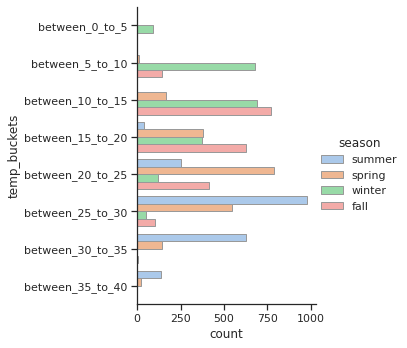

In [ ]:
# temp buckets and season
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(y="temp_buckets", hue="season", kind="count", palette="pastel", edgecolor=".6", data=climate_df)

Understanding the temprature distribution between the seasons.

* Need to cut outliers from winter with bucket of 25 to 30 degrees for example.

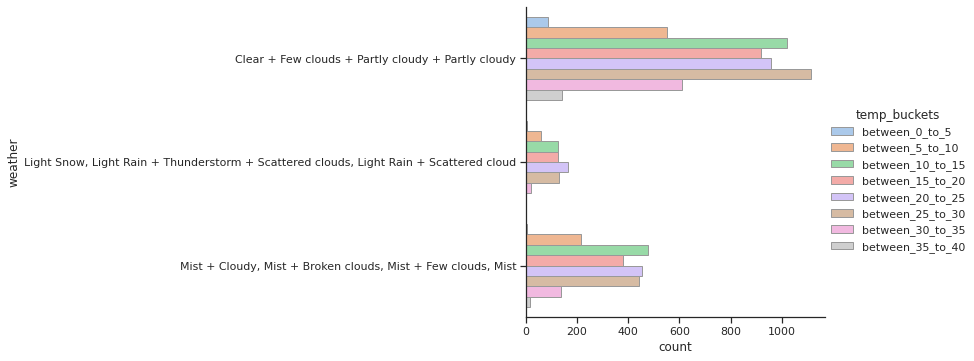

In [ ]:
# weather and temp buckets
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(y="weather", hue="temp_buckets", kind="count", palette="pastel", edgecolor=".6", data=climate_df)

Understanding the weather conditions distribution between the tempratures.

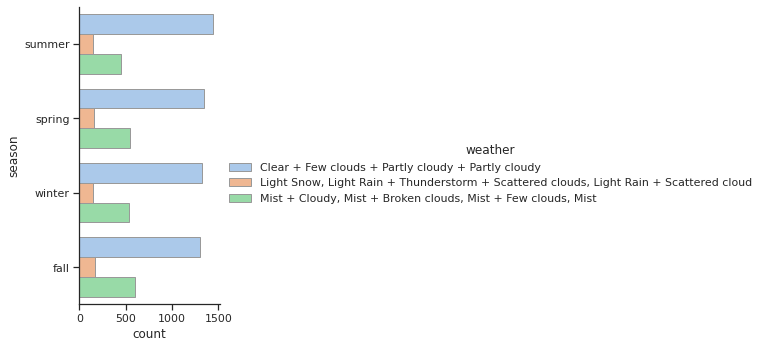

In [ ]:
# weather and season
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(y="season", hue="weather", kind="count", palette="pastel", edgecolor=".6", data=climate_df)

From that we can learn that the weather is equally appear over the seasons.

---



Text(0, 0.5, 'Sum of rented bicycles')

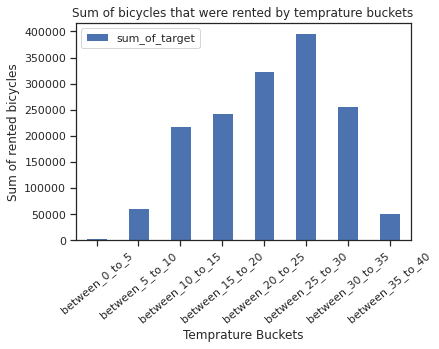

In [ ]:
climate_target_relation = climate_df.groupby(['temp_buckets'])['count'].sum().to_frame('sum_of_target').reset_index()
climate_target_relation.plot(kind='bar', x = 'temp_buckets', y = 'sum_of_target', rot = 40)
plt.title("Sum of bicycles that were rented by temprature buckets")
plt.xlabel("Temprature Buckets")
plt.ylabel("Sum of rented bicycles")

Text(0, 0.5, 'Sum of rented bicycles')

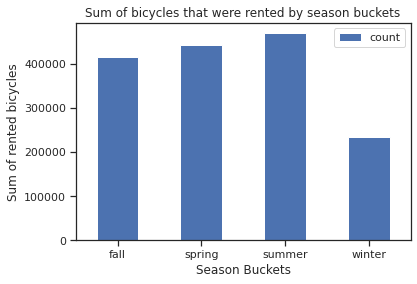

In [ ]:
weather_target_relation = df.groupby(['season'])['count'].sum().to_frame('count').reset_index()
weather_target_relation.plot.bar(x = 'season', y = 'count', rot=0)
plt.title("Sum of bicycles that were rented by season buckets")
plt.xlabel("Season Buckets")
plt.ylabel("Sum of rented bicycles")

In [ ]:
# fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
# fig.set_size_inches(12, 5)
# sns.regplot(x="temp", y="count", data=df,ax=ax1)
# sns.regplot(x="windspeed", y="count", data=df,ax=ax2)
# sns.regplot(x="humidity", y="count", data=df,ax=ax3)

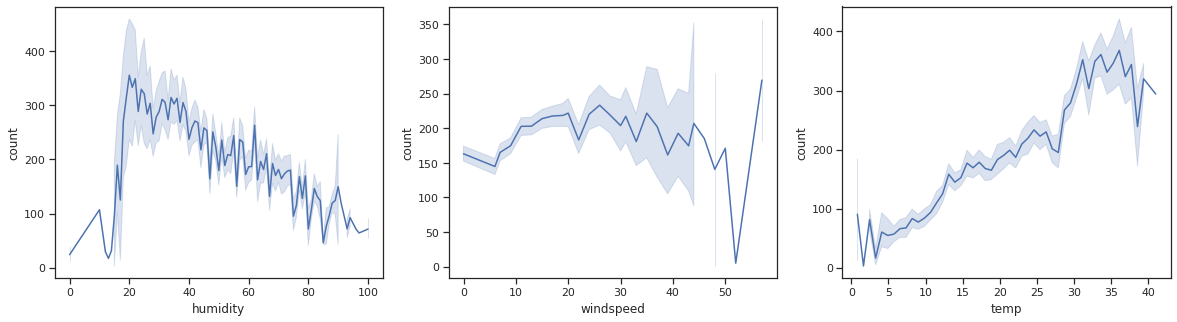

In [ ]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,5)
sns.lineplot(data=df, x="humidity", y="count", ax=axs[0])
sns.lineplot(data=df, x="windspeed", y="count", ax=axs[1])
sns.lineplot(data=df, x="temp", y="count", ax=axs[2])

The influnce of humidity, windspeed and temp on the target label with respect to the features variance.

# Normal Distributed Features

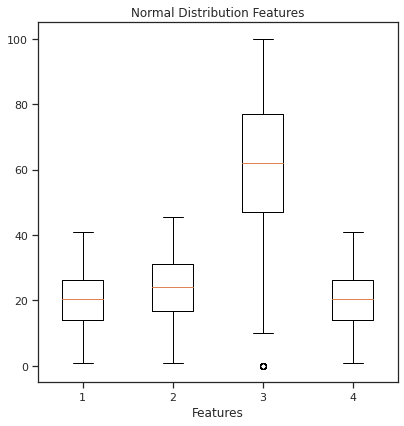

In [ ]:
fig = plt.figure(figsize =(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('Features')
ax.set_title('Normal Distribution Features')
bp = ax.boxplot([df['temp'], df['atemp'], df['humidity'], df['sunlight']])
plt.show()

we will remove the outliers in humidity accordingly the percentiles.

### Remove outleiers

In [ ]:
def remove_outleiers(df ,col_name):
    percentile25 = df[col_name].quantile(0.25)
    percentile75 = df[col_name].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    new = df[df[col_name] < upper_limit]
    df = new[df[col_name] > lower_limit]
    return df
df = remove_outleiers(df, 'humidity')

In [ ]:
# Plot notmal distributed features again to check for outleiers 
# Output box-plot of the features again to check if outleiers removal worked
#fig = plt.figure(figsize =(10, 7))
#ax = fig.add_axes([0, 0, 1, 1])
#ax.set_xlabel('Features')
#ax.set_title('Normal Distribution Features')
#bp = ax.boxplot([df['temp'], df['atemp'], df['humidity'], df['sunlight']])
#plt.show()

# More Pre-Processing 

In [ ]:
def rearrange_data(df):
    df = df[[col for col in df.columns if col != 'count'] + ['count']]
    return df

Dummies Variables

In [ ]:
all_cols = df.columns
NUMERICAL_FEATURES = list(df.select_dtypes(include=[np.number]).columns)
CATAGORIAL_FEATURES = list(set(all_cols) - set(NUMERICAL_FEATURES))
NUMERICAL_FEATURES.remove('count')
NUMERICAL_FEATURES.remove('is_workingday')
NUMERICAL_FEATURES.remove('is_holiday')
df = pd.get_dummies(df, columns=CATAGORIAL_FEATURES)
df = rearrange_data(df)

In [ ]:
df

,is_holiday,is_workingday,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,day_of_week_Friday,...,hour_bucket_non_working_day_afternoon__evening_ride,hour_bucket_non_working_day_mid_day_ride,hour_bucket_non_working_day_morning_ride,hour_bucket_non_working_day_night_early_morning_ride,hour_bucket_working_day_afternoon_evening_ride,hour_bucket_working_day_late_evening_ride,hour_bucket_working_day_mid_day_ride,hour_bucket_working_day_morning_ride,hour_bucket_working_day_night_ride,count
0,0,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,0,...,0,0,0,0,0,0,0,0,1,35
1,0,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,1,...,0,0,0,0,0,1,0,0,0,251
2,0,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,1,...,0,0,0,0,0,1,0,0,0,53
3,0,0,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,0,...,0,0,1,0,0,0,0,0,0,296
4,0,1,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,0,...,0,0,0,0,0,1,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,0,0,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,0,...,0,0,0,1,0,0,0,0,0,38
8160,0,0,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,0,...,0,0,1,0,0,0,0,0,0,149
8161,0,0,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,0,...,0,1,0,0,0,0,0,0,0,234
8162,0,0,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,0,...,0,0,0,1,0,0,0,0,0,22


Seperating the data to X, Y matrix

In [ ]:
def data_for_modeling(data):
    x = data.iloc[:, : -1]
    y= data.iloc[:, -1]
    return x, y
X_train, Y_train = data_for_modeling(df)

In [ ]:
# Let's check our features correlation with our target "count"

label_data = Y_train.squeeze()
label_corrs = X_train.corrwith(label_data).abs()
label_corrs = pd.DataFrame(label_corrs, columns = ['corr_with_label']) 
label_corrs = label_corrs.sort_values('corr_with_label', ascending = False) 
label_corrs.style.background_gradient(cmap = 'GnBu_r') 

# We'll notice that we have some features that are very strongly correlated with
# our target variable, and some that are not correlated at all

,corr_with_label
pollution,0.603539
hour_bucket_working_day_afternoon_evening_ride,0.436643
hour_bucket_working_day_night_ride,0.436279
sunlight,0.389121
temp,0.389121
atemp,0.385317
humidity,0.327450
hour_bucket_non_working_day_night_early_morning_ride,0.288513
hour_bucket_non_working_day_mid_day_ride,0.269134
year_2011,0.255902


# Applying Changes On Test set

In [ ]:
data_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

In [ ]:
df_test = handle_datetime(data_test)
df_test = handle_months(df_test)
df_test = change_day_weather_hour(df_test)

In [ ]:
df_test = pd.get_dummies(df_test, columns=CATAGORIAL_FEATURES)
df_test = rearrange_data(df_test)

In [ ]:
X_test, Y_test = data_for_modeling(df_test)

# Modeling

In [ ]:
models = {'Random forest': None, 'Decision tree': None, 'Linear Regression' : None}

### Random Forest

In [ ]:
# Random forest model
def run_random_forest(x, y):
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['auto', 'log2', 1/3],
                                      'max_depth' : [None, 30],
                                      'min_samples_leaf' : [1, 2, 4]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
    tuned_rf.fit(x, y)
    return tuned_rf

### Decision Tree

In [ ]:
# Decision Tree model
def run_decision_tree(x, y):
    dt = DecisionTreeRegressor(random_state=42)
    tuned_dt = GridSearchCV(estimator=dt, 
                          param_grid={'max_features': ['auto']},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3)
    tuned_dt.fit(x, y)
    return tuned_dt

### Linear Regressioon

In [ ]:
# Linear Regression model
def run_linear_regression(x, y):
    lr = LinearRegression()
    lr.fit(x, np.ravel(y))
    cv_score = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=3)
    return lr, cv_score

### Run all models

In [ ]:
# Run models:
def run_all_models(x, y):
    models_dict = {}
    t1 = time.perf_counter()
    models_dict['Random forest'] = run_random_forest(x, y)
    t2 = time.perf_counter()
    print(f'Random forest fit took {t2-t1} seconds')
    t1 = time.perf_counter()
    models_dict['Linear regression'] = run_linear_regression(x, y)
    t2 = time.perf_counter()
    print(f'Linear regression fit took {t2 - t1} seconds')
    t1 = time.perf_counter()
    models_dict['Decision tree'] = run_decision_tree(x, y) 
    t2 = time.perf_counter()
    print(f'Decision tree fit took {t2 - t1} seconds')
    return models_dict 

In [ ]:
models  = run_all_models(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-7349.176 total time=   8.6s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-7670.717 total time=   8.2s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-7909.384 total time=   8.2s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-7321.772 total time=   6.7s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-7600.547 total time=   6.6s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-7818.842 total time=   6.7s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-7258.463 total time=   5.6s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-7529.526 total time=   5.5s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-7697.044 total time=   5.6s
[CV

In [ ]:
# All CV scores
cv_scores = {}
cv_scores['Random forest'] = math.sqrt(-models['Random forest'].best_score_)
cv_scores['Decision tree'] = math.sqrt(-models['Decision tree'].best_score_ )
cv_scores['Linear regression'] = math.sqrt(-models['Linear regression'][1].mean())

cv_scores

{'Random forest': 84.88197941705123,
 'Decision tree': 123.73329166745316,
 'Linear regression': 95.54770722655766}

# Evaluate Models

## Evaluating on test set

In [ ]:
def evaluate_single_model(x, y, model):
    y_pred = model.predict(x)
    return math.sqrt(mean_squared_error(y, y_pred))

In [ ]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Decision tree'] = models['Decision tree'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict

{'Random forest': RandomForestRegressor(max_features=0.3333333333333333, min_samples_leaf=4,
                       n_estimators=200, random_state=42),
 'Decision tree': DecisionTreeRegressor(max_features='auto', random_state=42),
 'Linear regression': LinearRegression()}

In [ ]:
def evaluate_all_models(x_dict, y, models_dict):
    test_set_scores = {}
    for k, v in models_dict.items():
        test_set_scores[k] = evaluate_single_model(x_dict, y, v)
    return test_set_scores

In [ ]:
test_set_scores = evaluate_all_models(X_test, Y_test.values.ravel(), trained_models_dict)
test_set_scores

{'Random forest': 81.43462226741767,
 'Decision tree': 119.07091040480437,
 'Linear regression': 93.2264896639256}

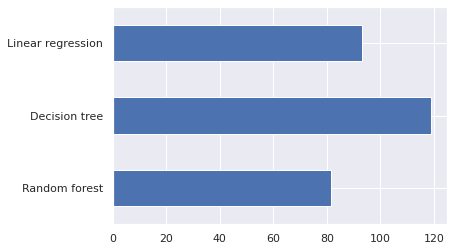

In [ ]:
sns.set()
cv_scores_df = pd.DataFrame.from_dict(test_set_scores, orient='index')
cv_scores_df.plot.barh(rot=0, legend=False)

## Features importance

In [ ]:
def find_tree_feature_importance(model, columns):
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance

In [ ]:
def find_normalized_lr_feature_importance(model, x_train):
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'].max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

In [ ]:
feature_importance_dict = {}

feature_importance_dict['Linear regression'] = find_normalized_lr_feature_importance(trained_models_dict['Linear regression'], X_train)
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X_train.columns)
feature_importance_dict['Decision tree'] = find_tree_feature_importance(trained_models_dict['Decision tree'], X_train.columns)

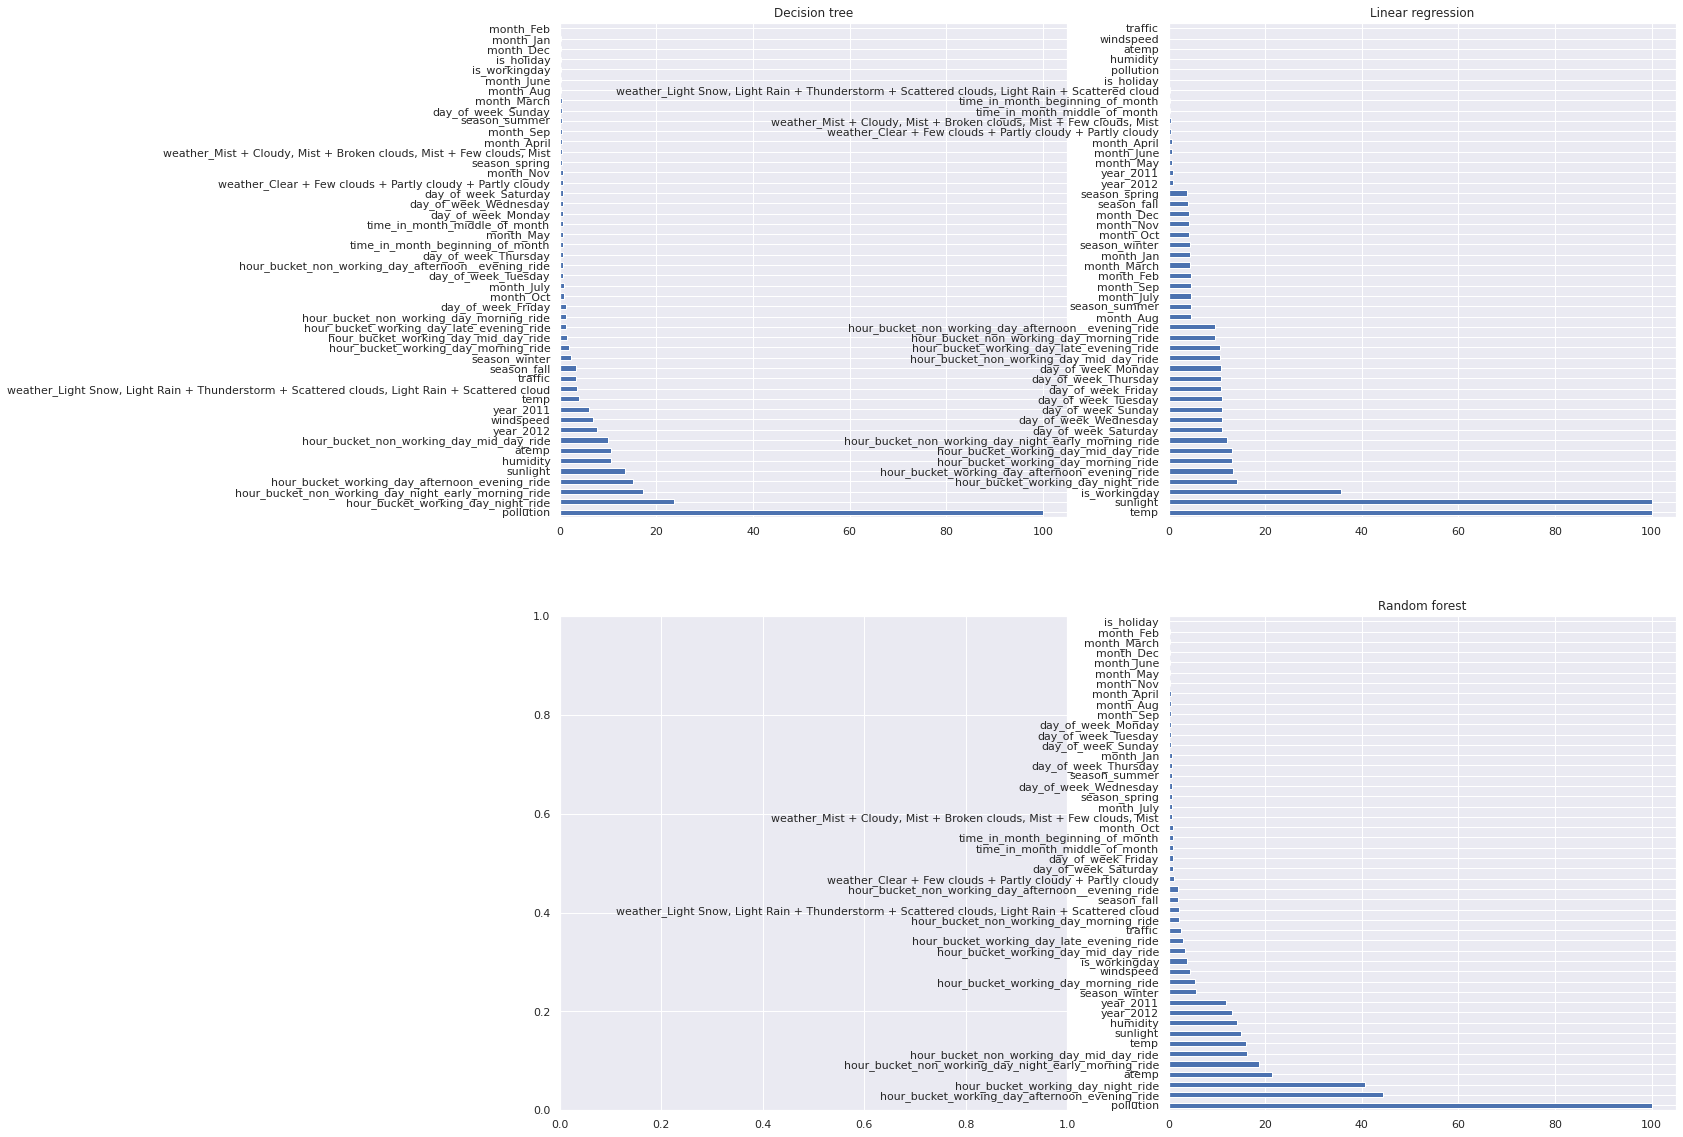

In [ ]:

sns.set()

fig, axes = plt.subplots(2, 2, figsize=(20, 20))


feature_importance_dict['Decision tree'].plot(kind='barh' , ax=axes[0, 0],  legend=False, title='Decision tree')
feature_importance_dict['Linear regression'].plot(kind='barh', ax=axes[0,1], legend=False, title='Linear regression')
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[1, 1], legend=False, title='Random forest')



## Features removal

In [ ]:
# We are removing features by: high correlation between 2 features (temp and sunlight), we will leave 'temp' and remove sunlight
X_train.drop('sunlight', axis=1,inplace=True)
X_test.drop('sunlight', axis=1,inplace=True)

In [ ]:
# Since we would like to reduce our models dimensionality as much as possible while
# still maintaining important features, we'll check what happens when we remove our
# five least important features

weak_features_dict = {}
for k, v in feature_importance_dict.items():
  weak_features_dict[k] = list(v.index.values[-5:])
weak_features_dict

{'Linear regression': ['pollution',
  'humidity',
  'atemp',
  'windspeed',
  'traffic'],
 'Random forest': ['month_June',
  'month_Dec',
  'month_March',
  'month_Feb',
  'is_holiday'],
 'Decision tree': ['is_workingday',
  'is_holiday',
  'month_Dec',
  'month_Jan',
  'month_Feb']}

In [ ]:
x_data_dict = {}
for k, v in weak_features_dict.items():
  x_data_dict[k] = (X_train.drop(v, axis=1), X_test.drop(v, axis=1))

In [ ]:
def run_all_models(x_dict, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x_dict['Random forest'][0], y)
  models_dict['Decision tree'] = run_decision_tree(x_dict['Decision tree'][0], y)
  models_dict['Linear regression'] = run_linear_regression(x_dict['Linear regression'][0], y)
  return models_dict

In [ ]:
models = run_all_models(x_data_dict, Y_train.values.ravel())
models


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-7341.948 total time=   7.4s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-7632.971 total time=   7.4s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1;, score=-7874.106 total time=   7.4s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-7322.263 total time=   6.0s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-7550.517 total time=   6.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2;, score=-7788.577 total time=   6.0s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-7250.824 total time=   5.0s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-7501.875 total time=   5.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4;, score=-7683.624 total time=   5.0s
[CV

{'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_depth': [None, 30],
                          'max_features': ['auto', 'log2', 0.3333333333333333],
                          'min_samples_leaf': [1, 2, 4]},
              scoring='neg_mean_squared_error', verbose=3),
 'Decision tree': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'max_features': ['auto']},
              scoring='neg_mean_squared_error', verbose=3),
 'Linear regression': (LinearRegression(),
  array([-10881.79286325, -11148.89565906, -11046.70413801]))}

In [ ]:
cv_scores_after = {}
cv_scores_after['Random forest'] = math.sqrt(-models['Random forest'].best_score_)
cv_scores_after['Decision tree'] = math.sqrt(-models['Decision tree'].best_score_)
cv_scores_after['Linear regression'] = math.sqrt(-models['Linear regression'][1].mean())
cv_scores_after

{'Random forest': 84.48533595622612,
 'Decision tree': 124.13444854535862,
 'Linear regression': 105.00379780483348}

In [ ]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Decision tree'] = models['Decision tree'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict

{'Random forest': RandomForestRegressor(max_features=0.3333333333333333, min_samples_leaf=4,
                       n_estimators=200, random_state=42),
 'Decision tree': DecisionTreeRegressor(max_features='auto', random_state=42),
 'Linear regression': LinearRegression()}

In [ ]:
def evaluate_all_models(x_dict, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    t1 = time.perf_counter()
    test_set_scores[k] = evaluate_single_model(x_dict[k][1], y, v)
    t2 = time.perf_counter()
    print(f"Predicting target with {v} took {t2-t1}")
  return test_set_scores

In [ ]:
test_set_scores_after = evaluate_all_models(x_data_dict, Y_test, trained_models_dict)
test_set_scores_after

Predicting target with RandomForestRegressor(max_features=0.3333333333333333, min_samples_leaf=4,
                      n_estimators=200, random_state=42) took 0.1391306719997374
Predicting target with DecisionTreeRegressor(max_features='auto', random_state=42) took 0.004825816000447958
Predicting target with LinearRegression() took 0.003949346999434056


{'Random forest': 81.22552967603377,
 'Decision tree': 119.7407559718301,
 'Linear regression': 104.74474858135329}

Random Forest fit took 215.56 seconds + 0.148 inference =  215.7 seconds total

Linear Regression fit took 0.094 seconds + 0.003 inference =  0.097 seconds total

Decision tree fit took 0.39 seconds + 0.005 inference =  0.395 seconds total




## Comparing our models before and after feature removal 

In [ ]:
combined_dict_after = {k: [np.abs(v), test_set_scores_after[k]] for k, v in cv_scores_after.items()}
new_scores_df = pd.DataFrame.from_dict(combined_dict_after, orient='index', columns=['CV score removed features', 'Test set score removed features'])
new_scores_df

,CV score removed features,Test set score removed features
Random forest,84.485336,81.225530
Decision tree,124.134449,119.740756
Linear regression,105.003798,104.744749


In [ ]:
combined_dict_after = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
scores_df = pd.DataFrame.from_dict(combined_dict_after, orient='index', columns=['CV score before removed features', 'Test set score before removed features'])
scores_df

,CV score before removed features,Test set score before removed features
Random forest,84.881979,81.434622
Decision tree,123.733292,119.070910
Linear regression,95.547707,93.226490


In [ ]:
combined_df = pd.concat([scores_df, new_scores_df], axis=1, ignore_index=False)
combined_df

,CV score before removed features,Test set score before removed features,CV score removed features,Test set score removed features
Random forest,84.881979,81.434622,84.485336,81.225530
Decision tree,123.733292,119.070910,124.134449,119.740756
Linear regression,95.547707,93.226490,105.003798,104.744749


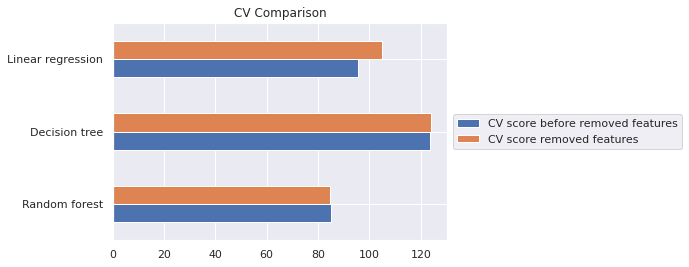

In [ ]:
combined_df[['CV score before removed features', 'CV score removed features']].plot(kind='barh', title = 'CV Comparison').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

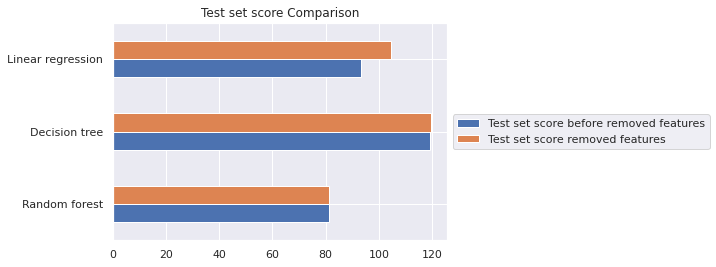

In [ ]:
combined_df[['Test set score before removed features', 'Test set score removed features']].plot(kind='barh', title = 'Test set score Comparison').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [ ]:
X_test.columns

Index(['is_holiday', 'is_workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'pollution', 'traffic', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'time_in_month_beginning_of_month', 'time_in_month_middle_of_month',
       'weather_Clear + Few clouds + Partly cloudy + Partly cloudy',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'year_2011', 'year_2012', 'month_April', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_July', 'month_June', 'month_March',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'hour_bucket_non_working_day_afternoon__evening_ride',
       'hour_bucket_non_working_day_mid_

## **Generate CSV file** ##

In [ ]:
# Keep keys the same, and replace values according to your results and the specified type 
New_features_created = ['Months(as dummies)','Seasons(as dummies:fall, winter, spring, summer)','Day_of_the_week(as dummies)',
       'weather_Clear + Few clouds + Partly cloudy + Partly cloudy',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
'hour_bucket_non_working_day_afternoon__evening_ride',
       'hour_bucket_non_working_day_mid_day_ride',
       'hour_bucket_non_working_day_morning_ride',
       'hour_bucket_non_working_day_night_early_morning_ride',
       'hour_bucket_working_day_afternoon_evening_ride',
       'hour_bucket_working_day_late_evening_ride',
       'hour_bucket_working_day_mid_day_ride',
       'hour_bucket_working_day_morning_ride',
       'hour_bucket_working_day_night_ride',
       'time_in_month_beginning_of_month', 'time_in_month_middle_of_month']

results = {'model': ['Random forest', 'Decision tree', 'Linear regression'],
           'Score (RMSE)': ['81.38', '117.74', '104.74'],
           'Hyperparams used': [models['Random forest'].best_params_, models['Decision tree'].best_params_, 'None'],
           'Features dropped': [weak_features_dict['Random forest']+ ['Datetime', 'sunlight', 'weather'], weak_features_dict['Decision tree']+ ['Datetime', 'sunlight', 'weather'], weak_features_dict['Linear regression']+ ['Datetime', 'sunlight', 'weather']],
           'New features created': [New_features_created, New_features_created, New_features_created],
           'Runtime trainining + inference (seconds)': ['215.7', '0.395', '0.097'],
           'Hardware used (GPU/CPU/TPU)': ['CPU', 'CPU', 'CPU'],
           'Explainability (top 3 features)': [feature_importance_dict['Random forest'][0:3].index.to_list(), feature_importance_dict['Decision tree'][0:3].index.to_list(), feature_importance_dict['Linear regression'][0:3].index.to_list()]
           }
df = pd.DataFrame(results)
df

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,Random forest,81.38,"{'max_depth': None, 'max_features': 0.33333333...","[month_June, month_Dec, month_March, month_Feb...","[Months(as dummies), Seasons(as dummies:fall, ...",215.7,CPU,"[pollution, hour_bucket_working_day_afternoon_..."
1,Decision tree,117.74,{'max_features': 'auto'},"[is_workingday, is_holiday, month_Dec, month_J...","[Months(as dummies), Seasons(as dummies:fall, ...",0.395,CPU,"[pollution, hour_bucket_working_day_night_ride..."
2,Linear regression,104.74,None,"[pollution, humidity, atemp, windspeed, traffi...","[Months(as dummies), Seasons(as dummies:fall, ...",0.097,CPU,"[temp, sunlight, is_workingday]"


In [ ]:
import os
df.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))